This is part 1, in this we will use GTI vehicle image database available here: http://www.gti.ssr.upm.es/data/Vehicle_database.html.
This dataset has cars and non-cars images ~8k. Images are of 64*64 in resolution. The goal is to train HOG created features with Support Vector Machines(SVC). The process is follows:
*  Read Images.
*  Find HOG features of image.
*  Train SVC on features vector.
*  Predict with SVCs.



In [4]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, exposure
import imutils
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,8)

In [1]:
!cp /content/drive/MyDrive/Datasets/car-noncars.zip /content/

In [2]:
!unzip --qq /content/car-noncars.zip

## Show Images

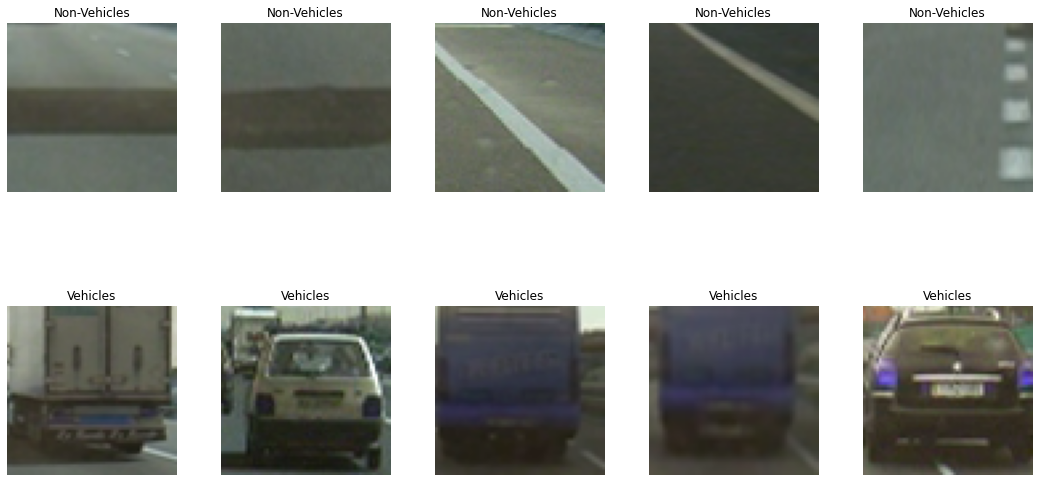

In [11]:
# sample some images

p1 = "/content/VehicleImage/non-vehicles/MiddleClose/"
sample_imgs = [p1+i for i in os.listdir(p1)[:5]]
p2 = "/content/VehicleImage/vehicles/MiddleClose/"
sample_imgs = sample_imgs + [p2+j for j in os.listdir(p2)[:5]]
sample_labels = ["Non-Vehicles"]*5 + ["Vehicles"]*5

r,c = 2,5
f, axs = plt.subplots(r,c)
f.tight_layout()
a= 0

for i in range(r):
  for j in range(c):
    im = cv2.imread(sample_imgs[a])
    axs[i,j].imshow(im)
    axs[i,j].set_title(sample_labels[a])
    axs[i,j].axis('off')
    a+=1

In [8]:
# image size
cv2.imread(image_ids[0]).shape

(64, 64, 3)

## Make Dataset

In [9]:
non_cars_paths = [p1+i for i in os.listdir(p1)][:500]
cars_paths = [p2+i for i in os.listdir(p2)][:500]

images_path = non_cars_paths + cars_paths
labels = [0]*len(non_cars_paths) + [1]*len(cars_paths) # non cars 0 and cars 1

X_train, X_test, Y_train, Y_test = train_test_split(images_path, labels, test_size= 0.3)

print('Total Train samples:', len(Y_train))
print('Total Test samples:', len(Y_test))

Total Train samples: 700
Total Test samples: 300


## Show HOG images sample 

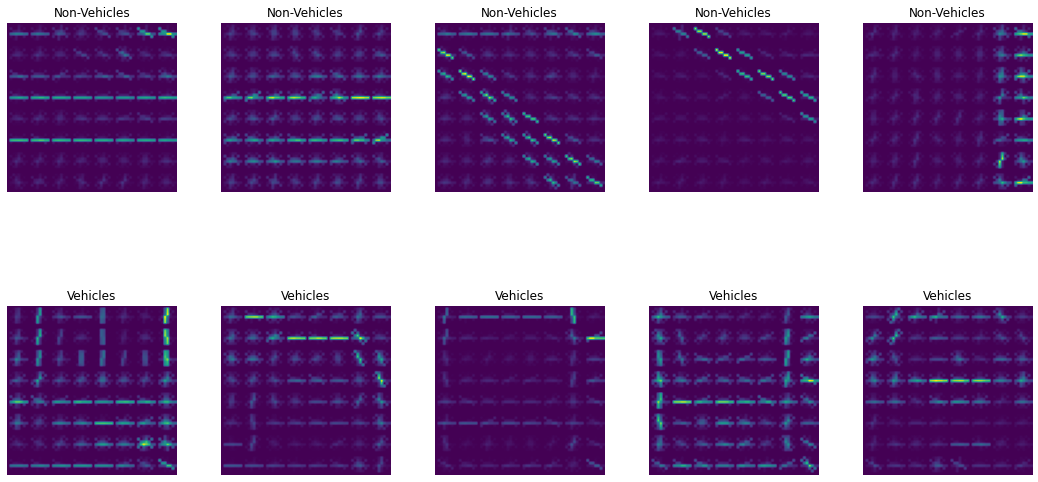

In [12]:
r,c = 2,5
f, axs = plt.subplots(r,c)
f.tight_layout()
a= 0

for i in range(r):
  for j in range(c):
    img = cv2.imread(sample_imgs[a])
    HOG_features, Hog_image = feature.hog(img, 9, visualize=True, 
                                          pixels_per_cell=(8,8), cells_per_block=(2,2), 
                                          feature_vector=True)
    img = exposure.rescale_intensity(Hog_image, out_range=(0, 255))
    axs[i,j].imshow(img)
    axs[i,j].set_title(sample_labels[a])
    axs[i,j].axis('off')
    a+=1

## Prepare hog features

In [13]:
def get_hog_feaures(image):
  # image values is already normalized under hog function
  Hog_features = feature.hog(image, orientations=9, 
                          pixels_per_cell=(8,8), cells_per_block=(2,2), 
                            feature_vector=True)
  return Hog_features

In [14]:
# read image, get HOG features 

train_features = []

for image in X_train: 
  image = cv2.imread(image, cv2.COLOR_BGR2GRAY)
  hog_features = get_hog_feaures(image)
  train_features.append(hog_features)  

In [15]:
# train a svm on them

svc1 = LinearSVC(tol=0.0001, random_state=42)
svc1 = svc1.fit(train_features, Y_train)

In [17]:
# predict with svm

correct = 0

for image,label in zip(X_test, Y_test):
  image = cv2.imread(image, cv2.COLOR_BGR2GRAY)
  features = get_hog_feaures(image)
  yhat = svc1.predict((features).reshape(1, features.shape[0]))
  if yhat[0] == label:
    correct+=1

print('{0} Correct out of {1}'.format(correct, len(Y_test)))   
print("Accuracy:", correct/len(Y_test)*100)

296 Correct out of 300
Accuracy: 98.66666666666667


## Show results

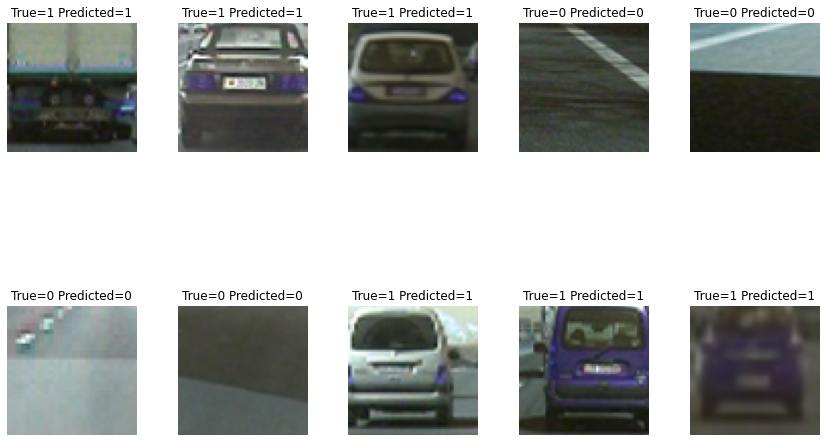

In [18]:
# SVC results
plt.rcParams["figure.figsize"] = (12,8)

a = 0
f, axs = plt.subplots(2, 5)
f.tight_layout()
for i in range(r):
  for j in range(c):
    image = cv2.imread(X_test[a], cv2.COLOR_BGR2GRAY)
    features = get_hog_feaures(image)
    yhat = svc1.predict((features).reshape(1, features.shape[0]))
    axs[i,j].imshow(image, cmap='gray')
    axs[i,j].set_title("True={0} Predicted={1}".format(Y_test[a], yhat[0]))
    axs[i,j].axis('off')
    a+=1

**Summary**: With this we trained our car classifeir using HOG features and SVM. This Dataset was very easy and did not had much complex differences in images(like objects, variations, lightning conditions etc).  Few things to learn here:
* This is method proves to be benificial when processing requirements are low(pi devices)
* As always many things depend on input dataset quality.
* This method can be used to recognize faces also, but fairly amount of images per face is a good requirement. 
